<a href="https://colab.research.google.com/github/annazxc/updated-uni-projects/blob/main/LLM_benchmarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Purpose:  
##Testing date:2025/3/12
##LLMs : Claude 3.7 Sonnet, Chatgpt 4o, Deepseek
###Setting a set of benchmarks to test the ability of LLMs for solving engineering problems

##p.s.因為有些LLM英文的訓練資料較多，因此皆以英文問，希望能測試他們最好的能力

# Integrating a noisy signal
##Prompt:  
You are an engineer, doing an experiment for Principles of sensors and measurement systems.  
Please follow the instructions, do them step by step carefully.
1. Matlab simulations
- Create 100 different sets of random signals, each set has 1000 points, zero mean, and a standard deviation of 2.5.
- Assuming the sampling time of each signal set is 1 ms, integrate each set of the signal for 1 second.  
(Note, since it is a set of discrete-time points, you would do the "summation" instead of "integral" to obtain the integral value.)

- Plot the mean value and standard deviation for the above 100 signals as a function of time.   
p.s. Useful Matlab functions: randn, std, mean, plot, etc.  

2. Do a curve fitting for "standard deviation $c_1* t^{c_2} $", and find the values for $C_1$ and $C_2$ .  
 (Hint: $log(standard deviation) = log(c₁) + c₂log(t)$, and then using the least square method.)

3. Do a curve fitting for "$mean value = C_3 + C_4t$", and find the values for $C_3$ and $C_4 $ using the least square method.

---

#Expected results:  預期結果
本實驗的目標為：分析雜訊對量測的訊號有什麼影響  
考慮隨機雜訊, 取樣數足夠, 則會為常態分布。  
也就是說，取樣值落在距離平均值一個標準差內的機率為 68%，  
兩個標準差內的機率為 95.4%，三個標準差內的機率為 99.7%   
對於標準常態分布，平均值 $ \mu = 0 $，標準差 $ \sigma = 1 $。  
在 MATLAB 中，`randn()` 是標準常態分布，因此我們應該調整為：

signals = std_dev * randn(num_points, num_signals);
   
在任一組隨機訊號中,我們假設取樣週期為一毫秒,且共取1000點,因此總取樣時間為1秒。  
我們要將這些雜訊取樣點做summation(取樣點為離散的),看平均值及標準差如何隨時間變化  
平均值初始值=0,預期隨時間增加,平均值的summation一直維持0,因為雜訊完全隨機,  
因此curve fitting $mean value = C_3 + C_4t$,答案應為$C_3\approx 0$ , $C_4\approx 0$  
標準差of a random walk隨時間增長,且正比於$t^{0.5}$,因此$C_2\approx0.5$



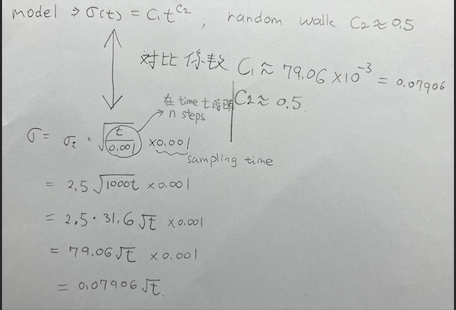

#Results:

#1.Deepseek

#1: MATLAB Simulations
% Generate 100 signals, each with 1000 points, zero mean, std=2.5
num_signals = 100;
num_points = 1000;
signals = 2.5 * randn(num_points, num_signals);

% Integrate each signal (cumulative sum)
integrated = cumsum(signals, 1);

% Compute mean and standard deviation across signals at each time point
mean_values = mean(integrated, 2);
std_values = std(integrated, 0, 2);

% Time vector (1ms to 1000ms converted to seconds)
t = (1:num_points) * 0.001;

% Plot mean and standard deviation
figure;
subplot(2,1,1);
plot(t, mean_values);
xlabel('Time (s)');
ylabel('Mean');
title('Mean of Integrated Signals vs Time');

subplot(2,1,2);
plot(t, std_values);
xlabel('Time (s)');
ylabel('Standard Deviation');
title('Standard Deviation of Integrated Signals vs Time');

#2: Curve Fitting for Standard Deviation
% Log-transform for power law fitting
log_t = log(t(:));
log_std = log(std_values(:));

% Least squares fit: log(std) = log(c1) + c2*log(t)
A = [ones(size(log_t)), log_t];
coeffs = A \ log_std;
c1 = exp(coeffs(1));
c2 = coeffs(2);

disp(['c1 (Standard Deviation): ', num2str(c1)]);
disp(['c2: ', num2str(c2)]);
#3: Curve Fitting for Mean Value
% Assume linear model: mean = c3 + c4*t
A_mean = [ones(size(t(:))), t(:)];
coeffs_mean = A_mean \ mean_values(:);
c3 = coeffs_mean(1);
c4 = coeffs_mean(2);

disp(['c3 (Mean): ', num2str(c3)]);
disp(['c4: ', num2str(c4)]);

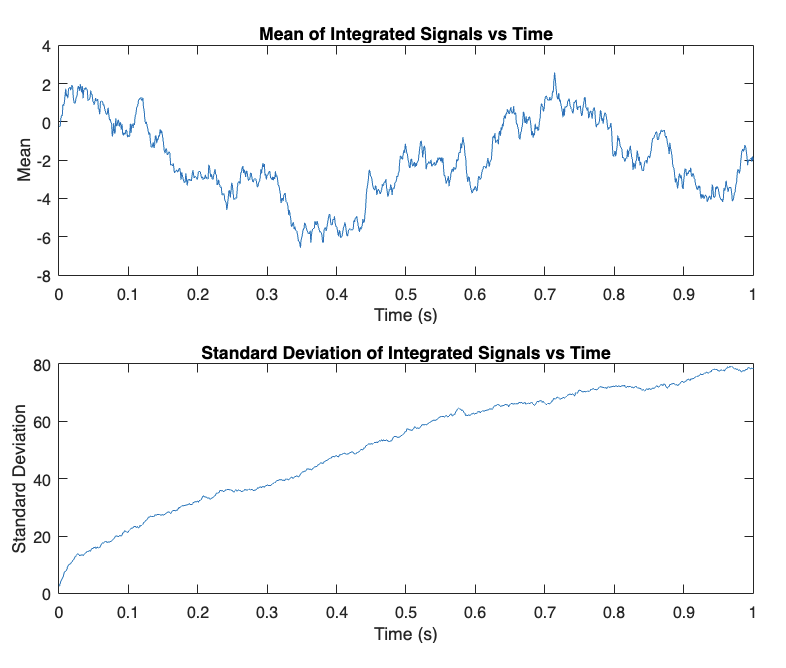

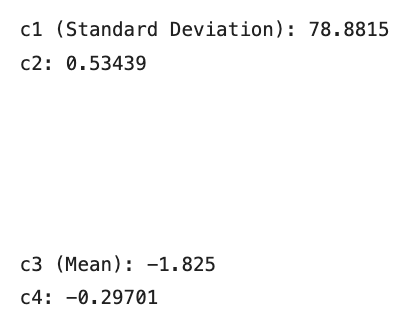

##Comments:
- 少考慮了取樣時間 1ms, 因此 c1,c2 ,c4 都差了1000倍,  
程式和文字詢問皆錯誤, 但後來再提問讓他反思,能有正確結果。  
以下截圖


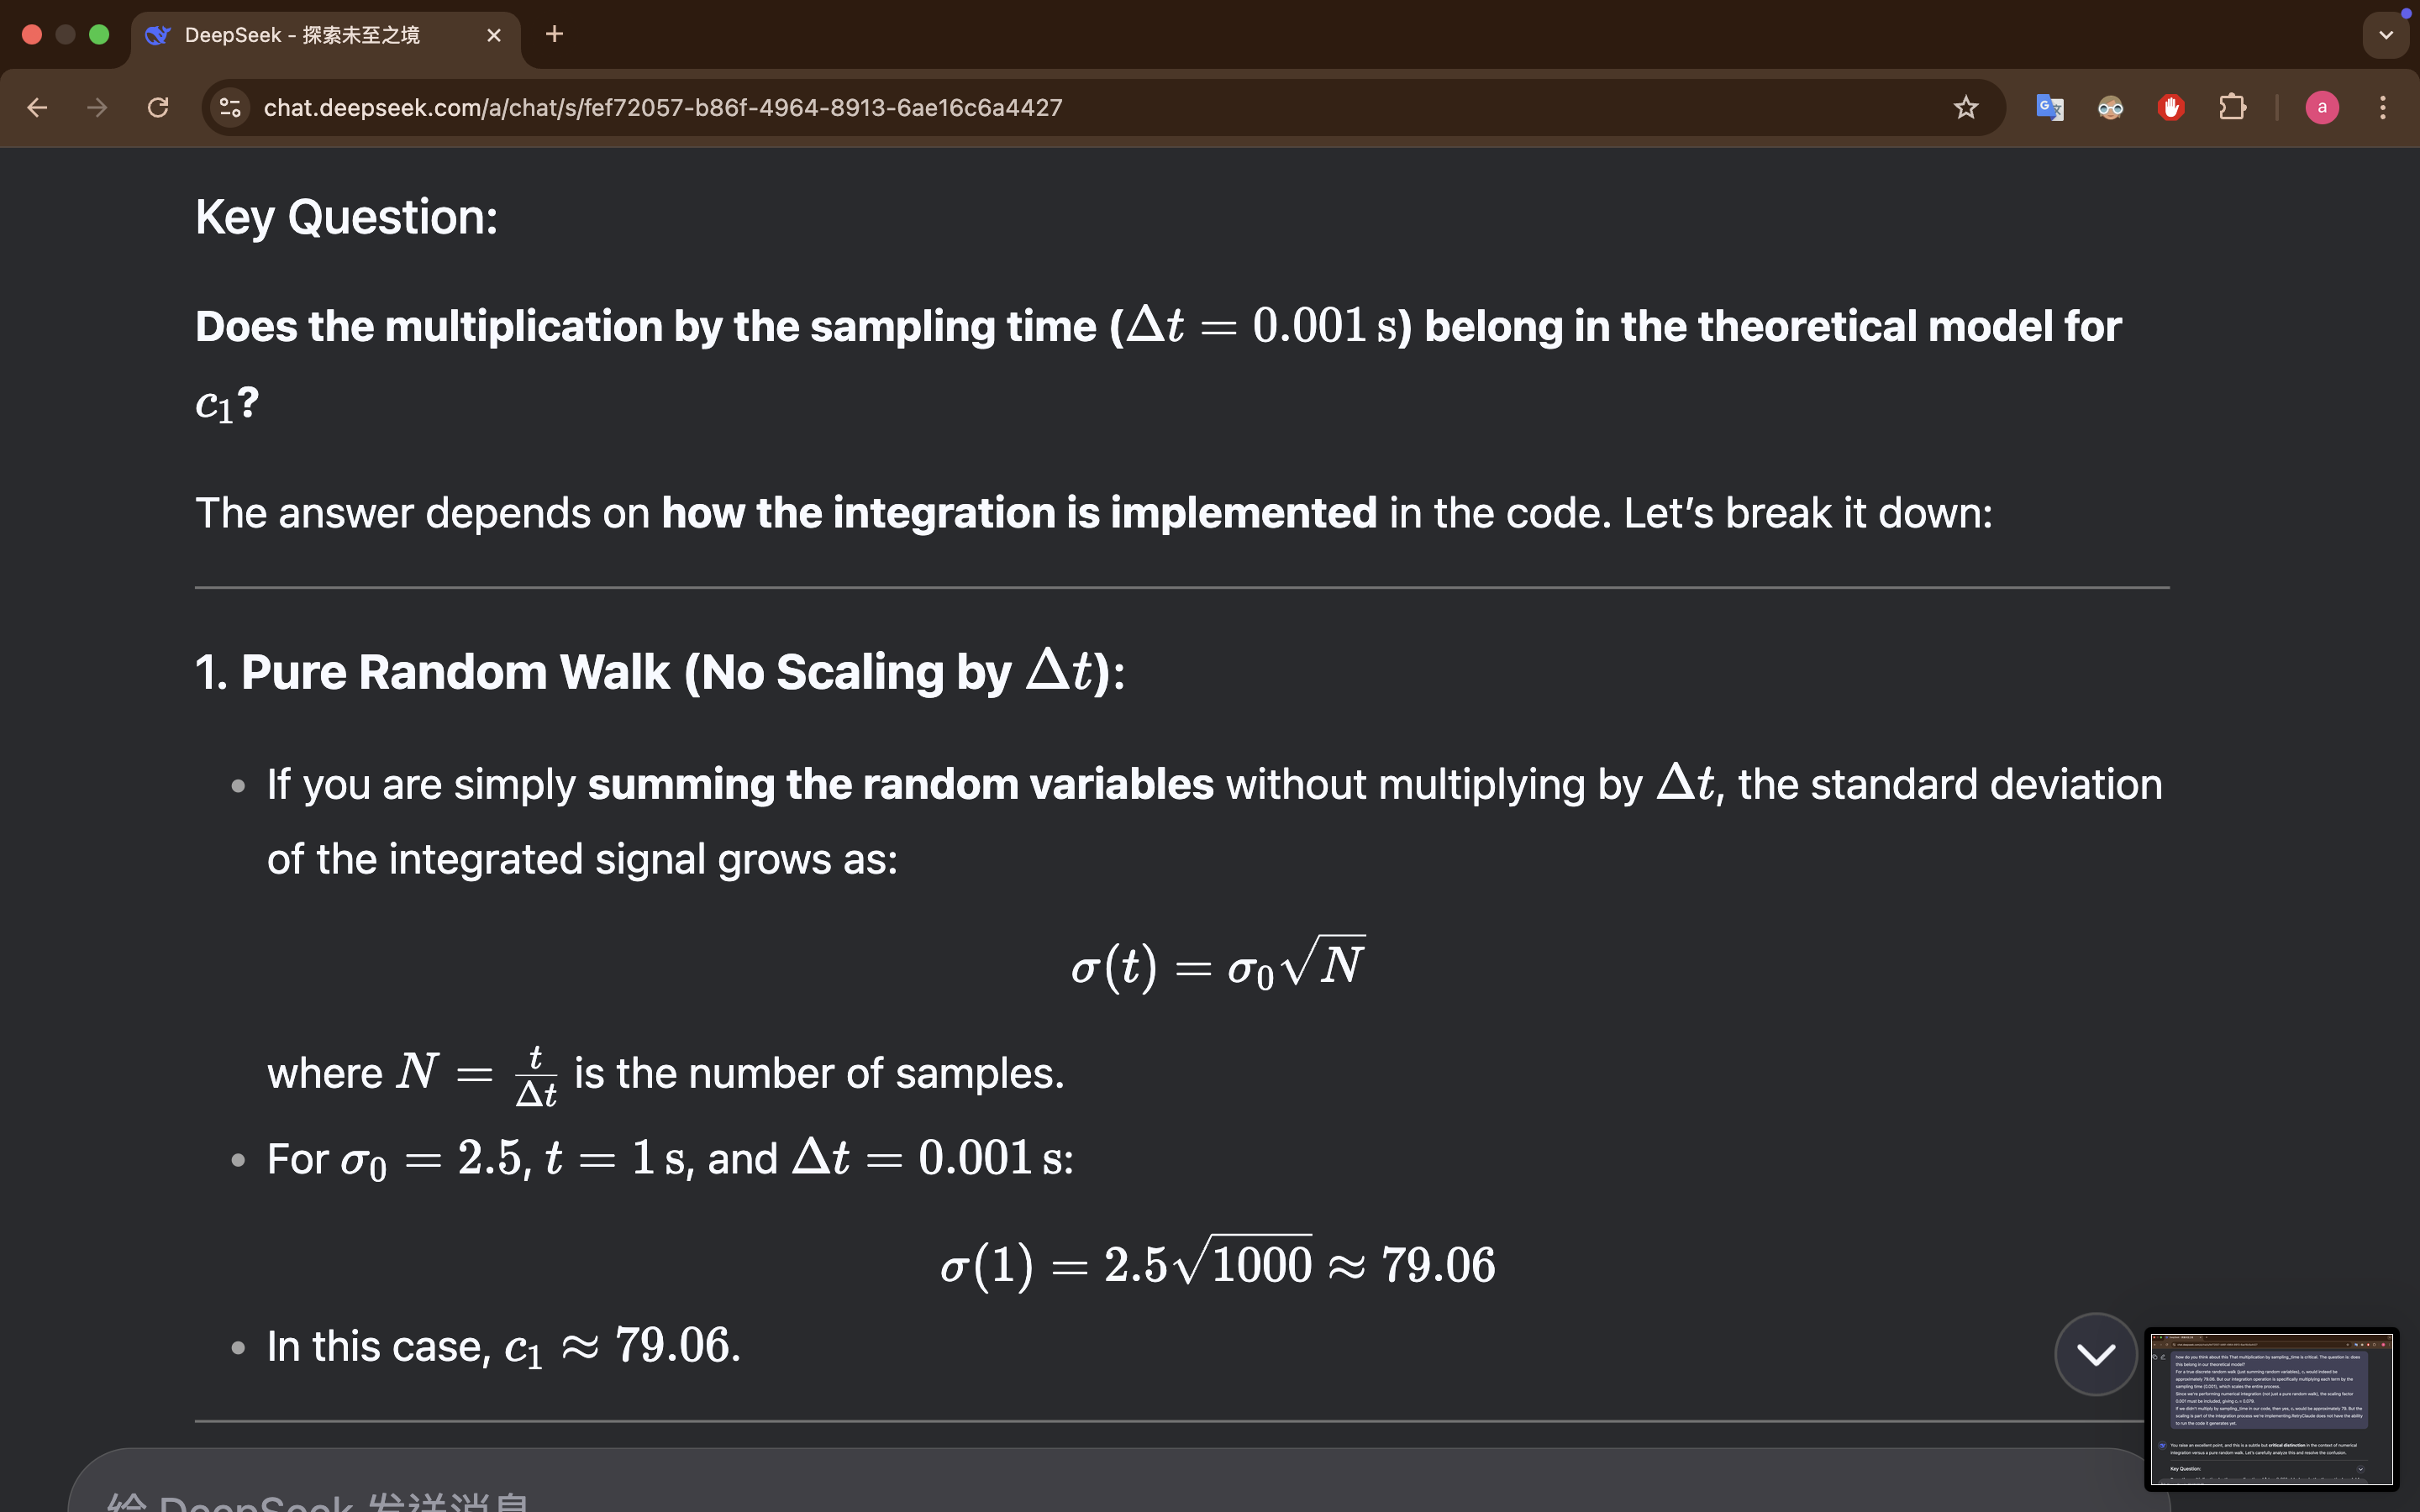

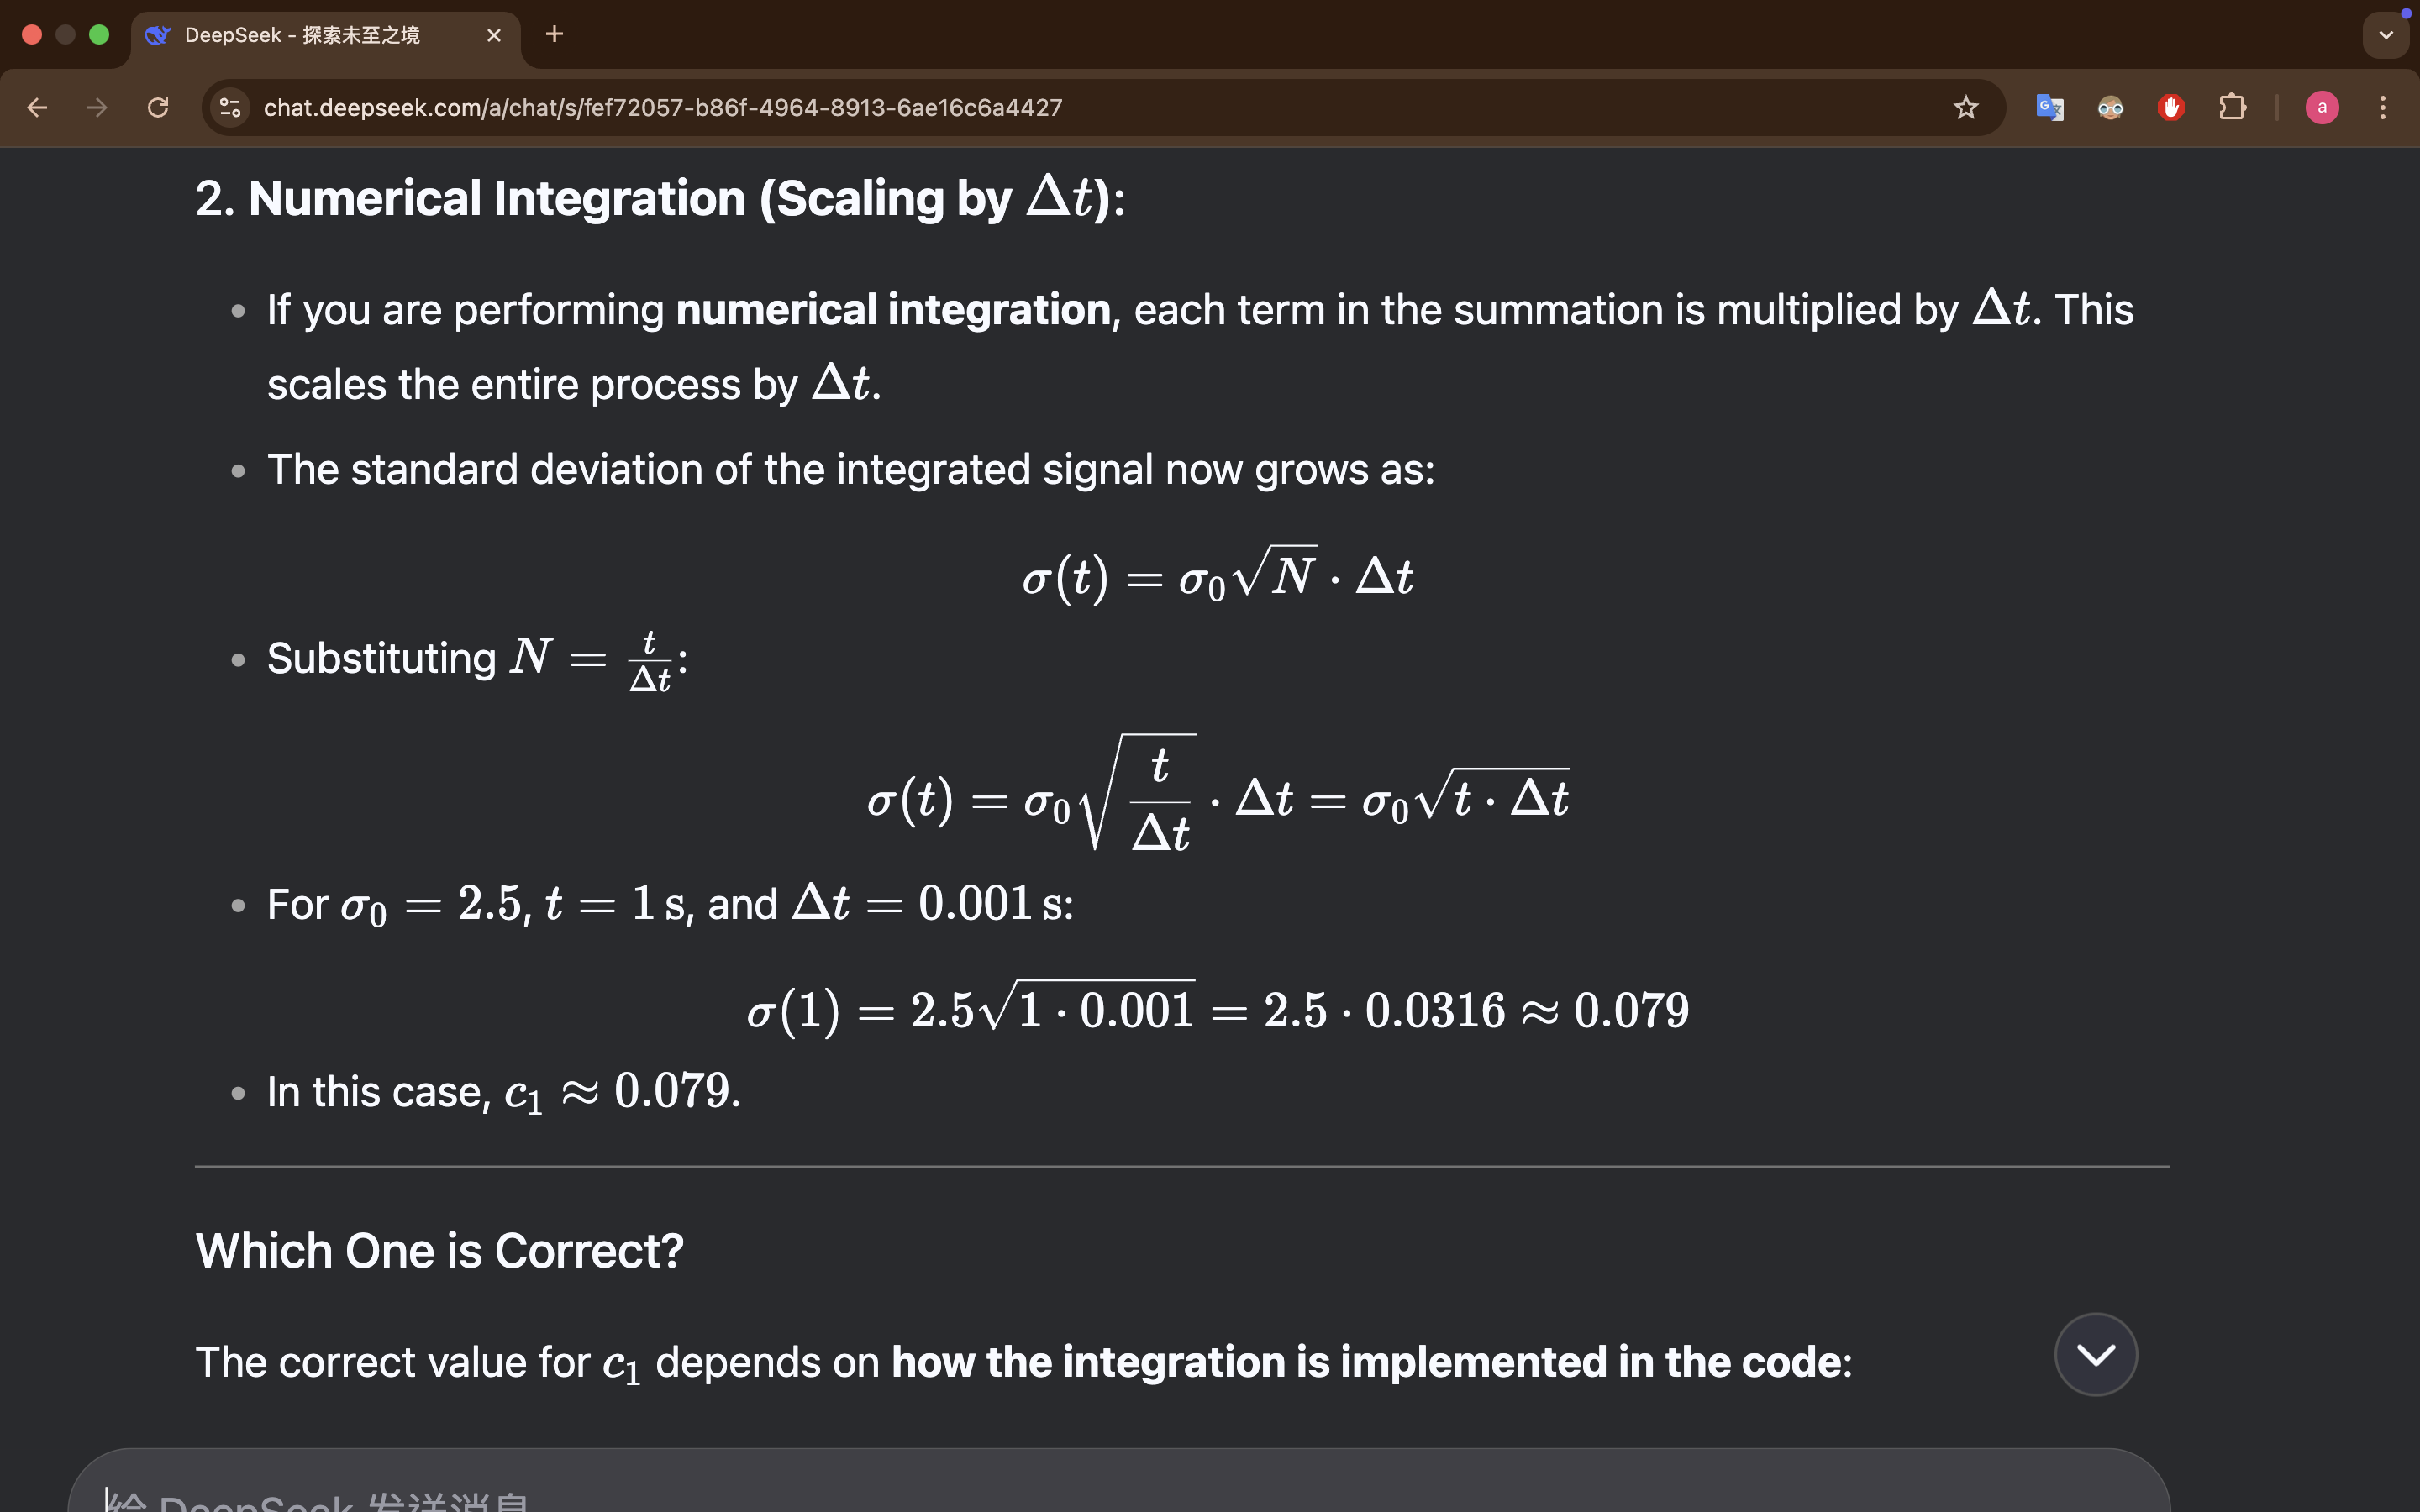

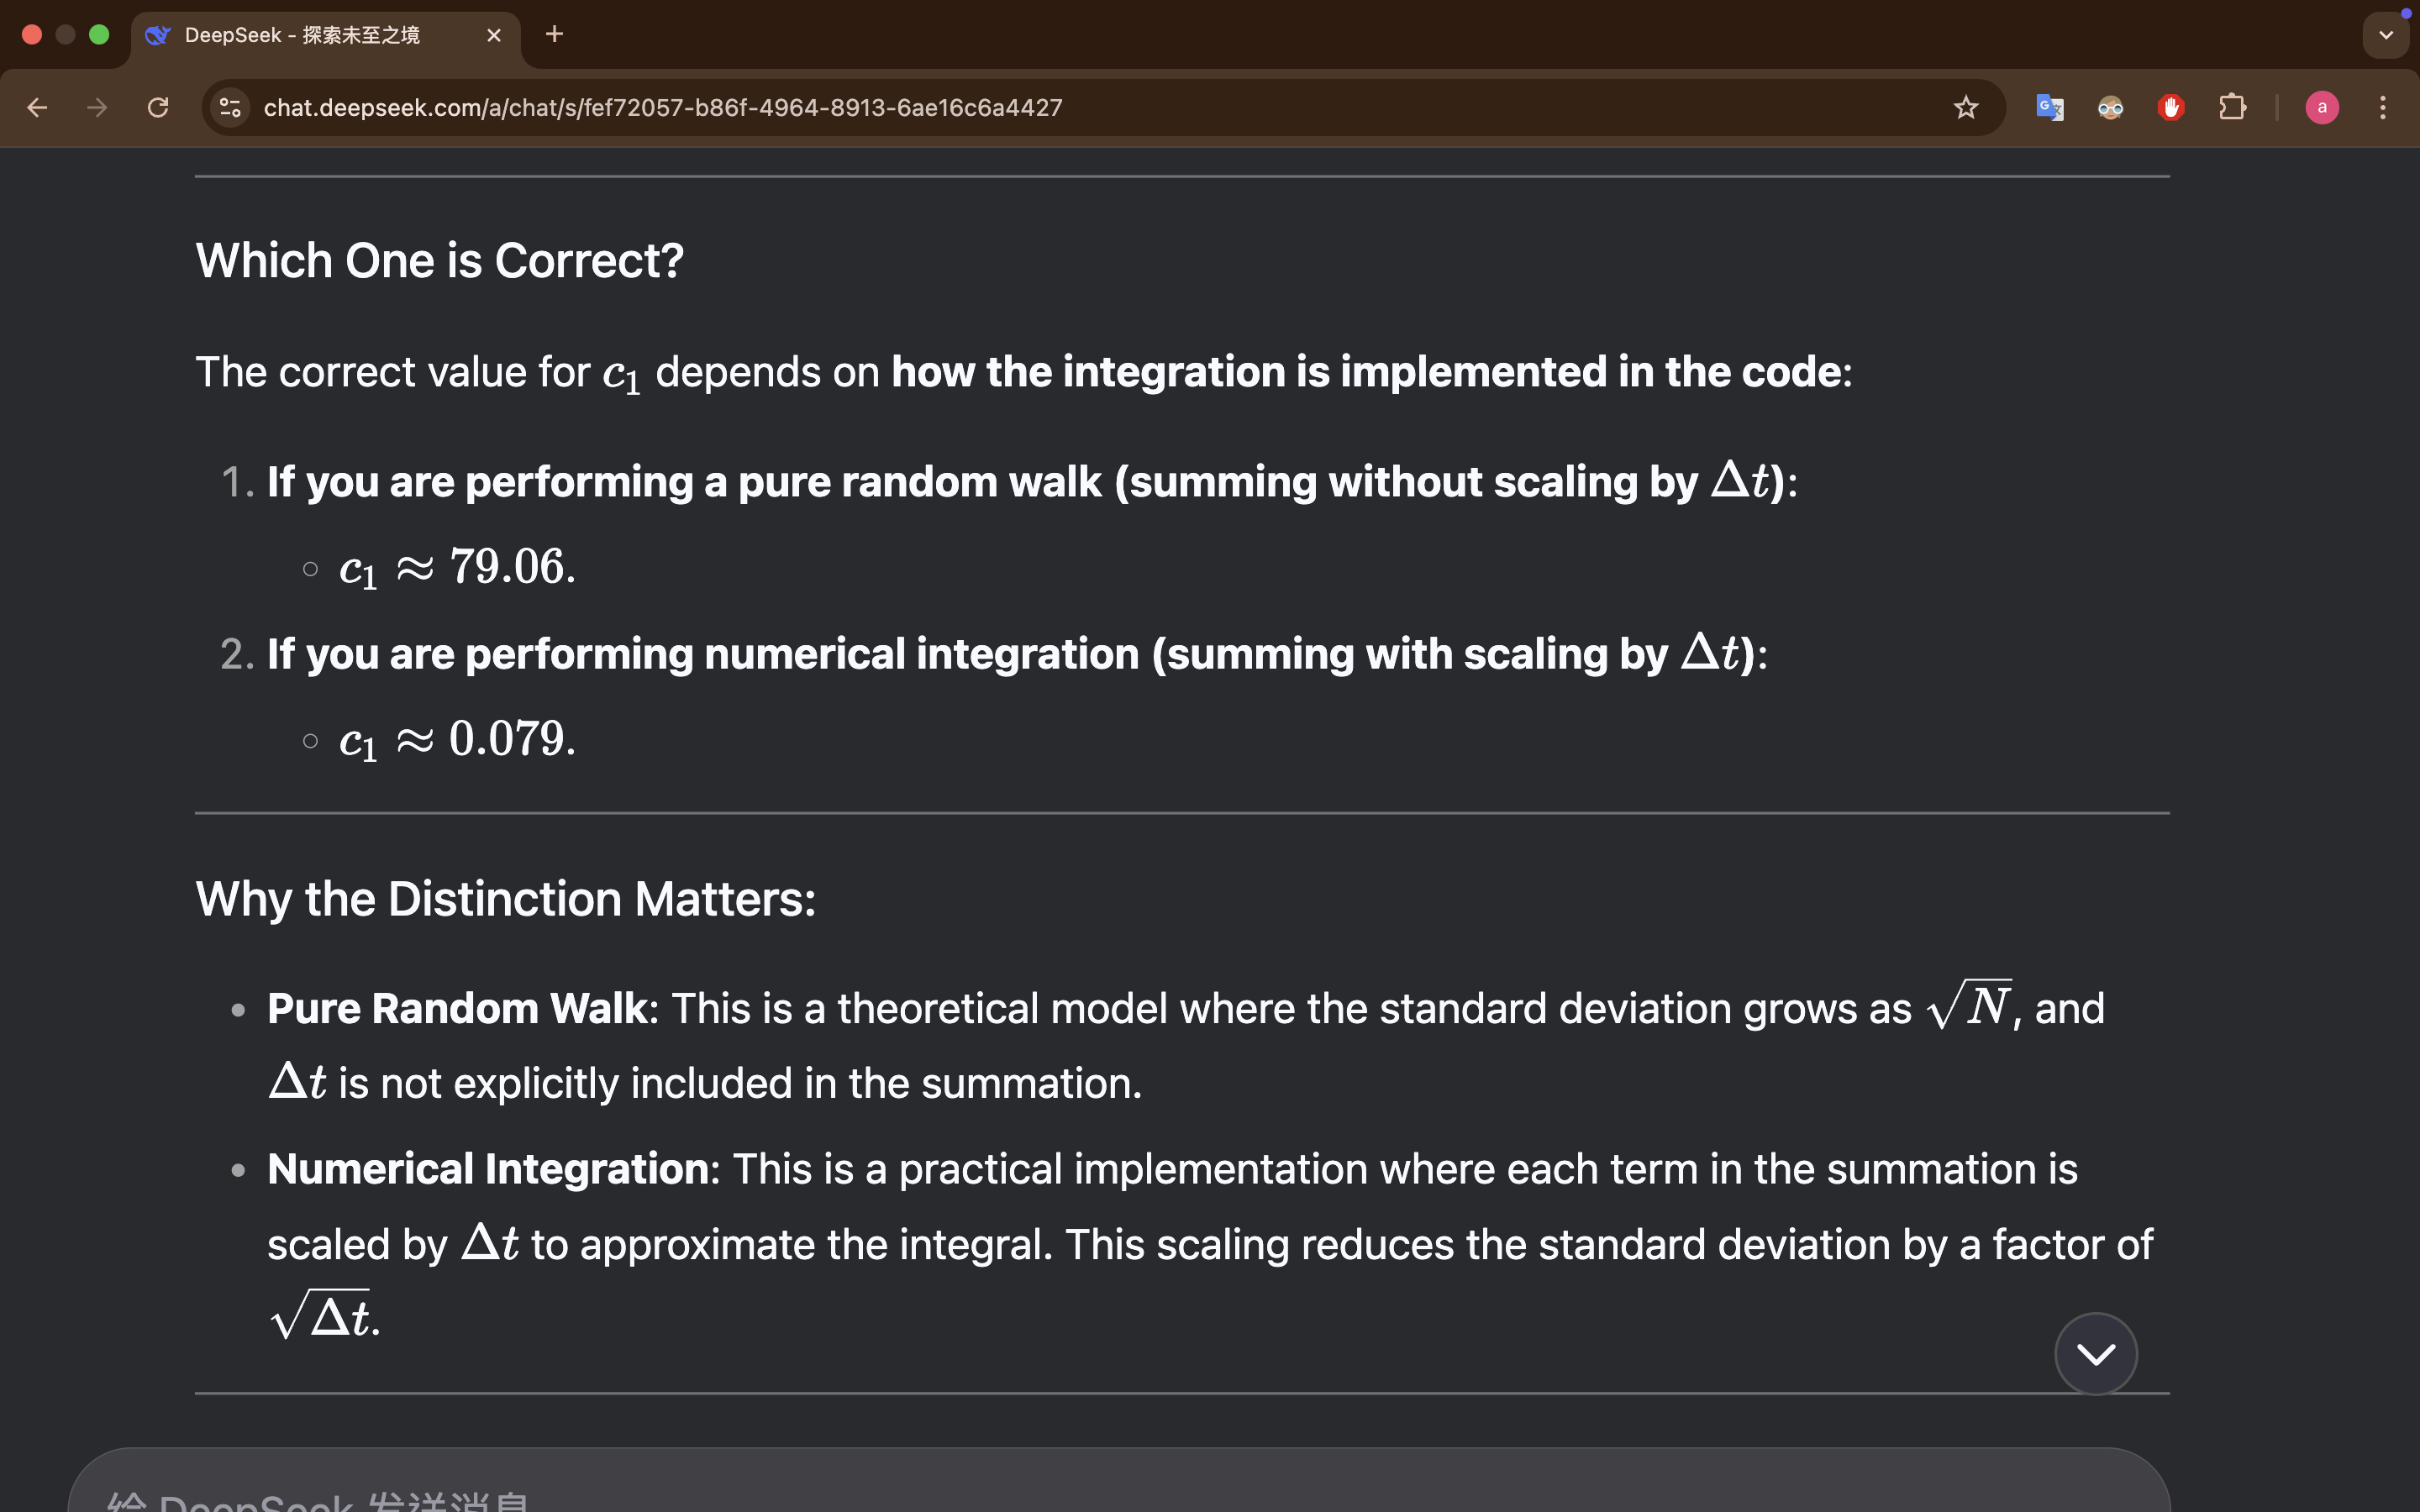

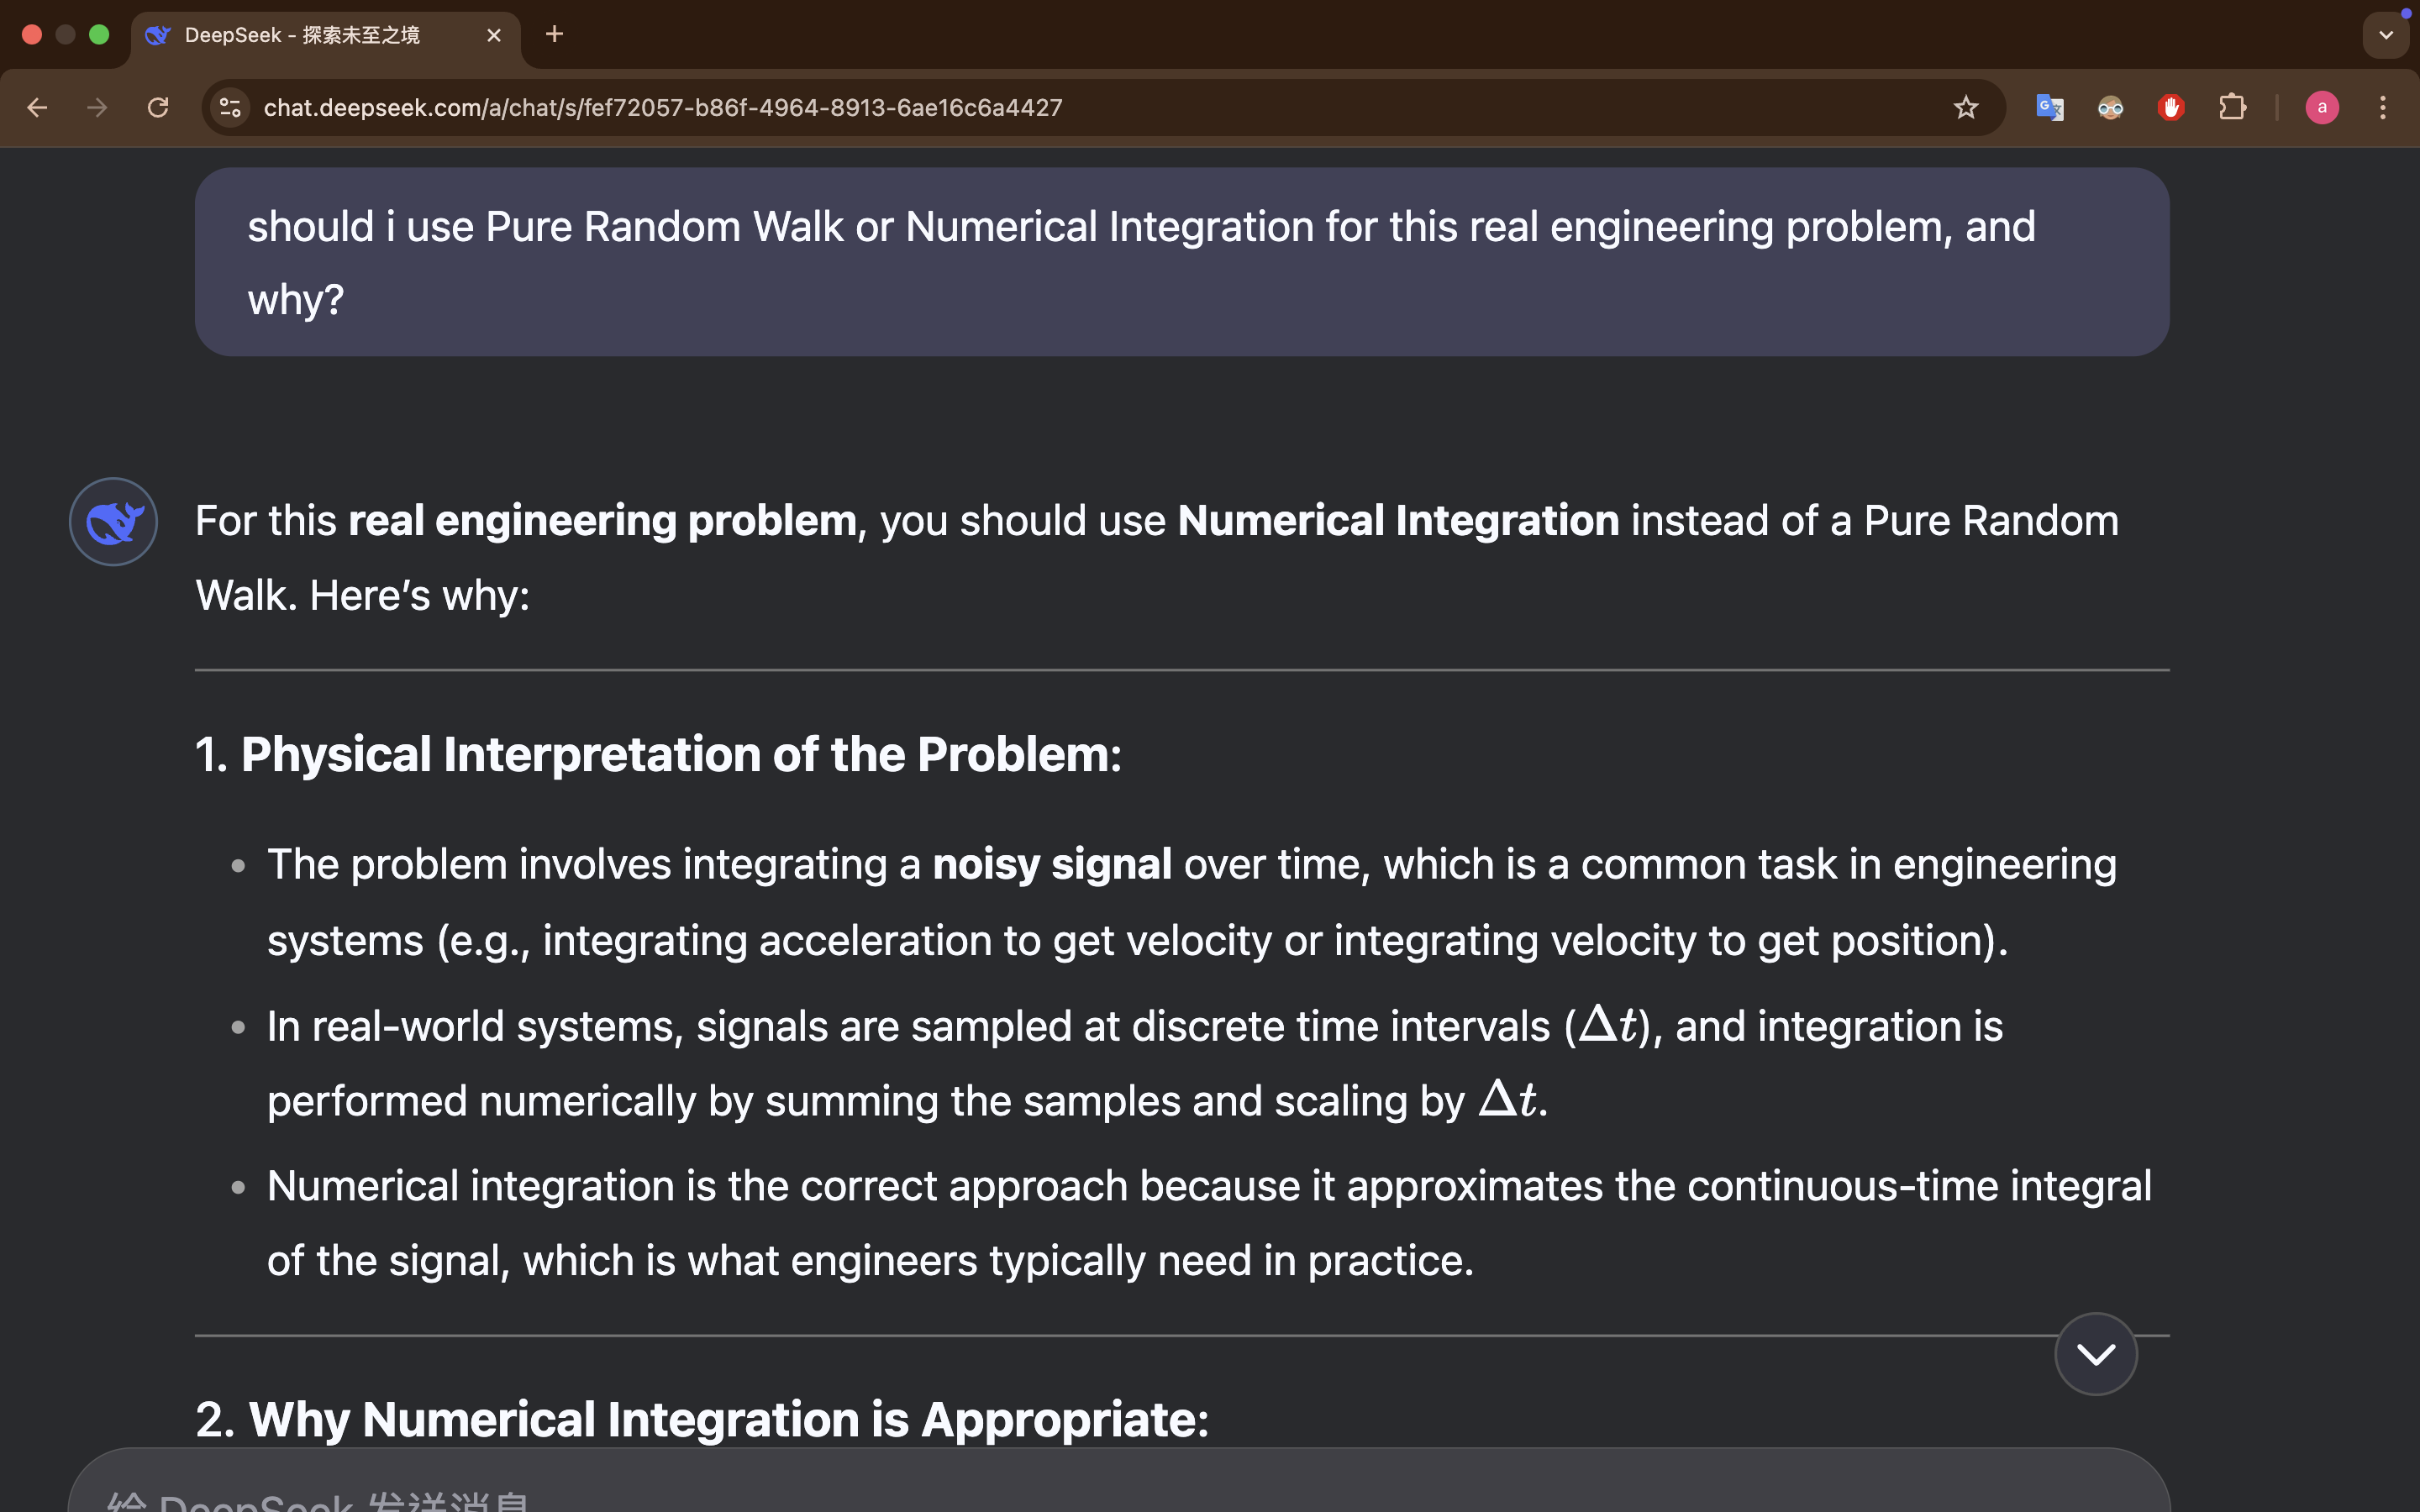

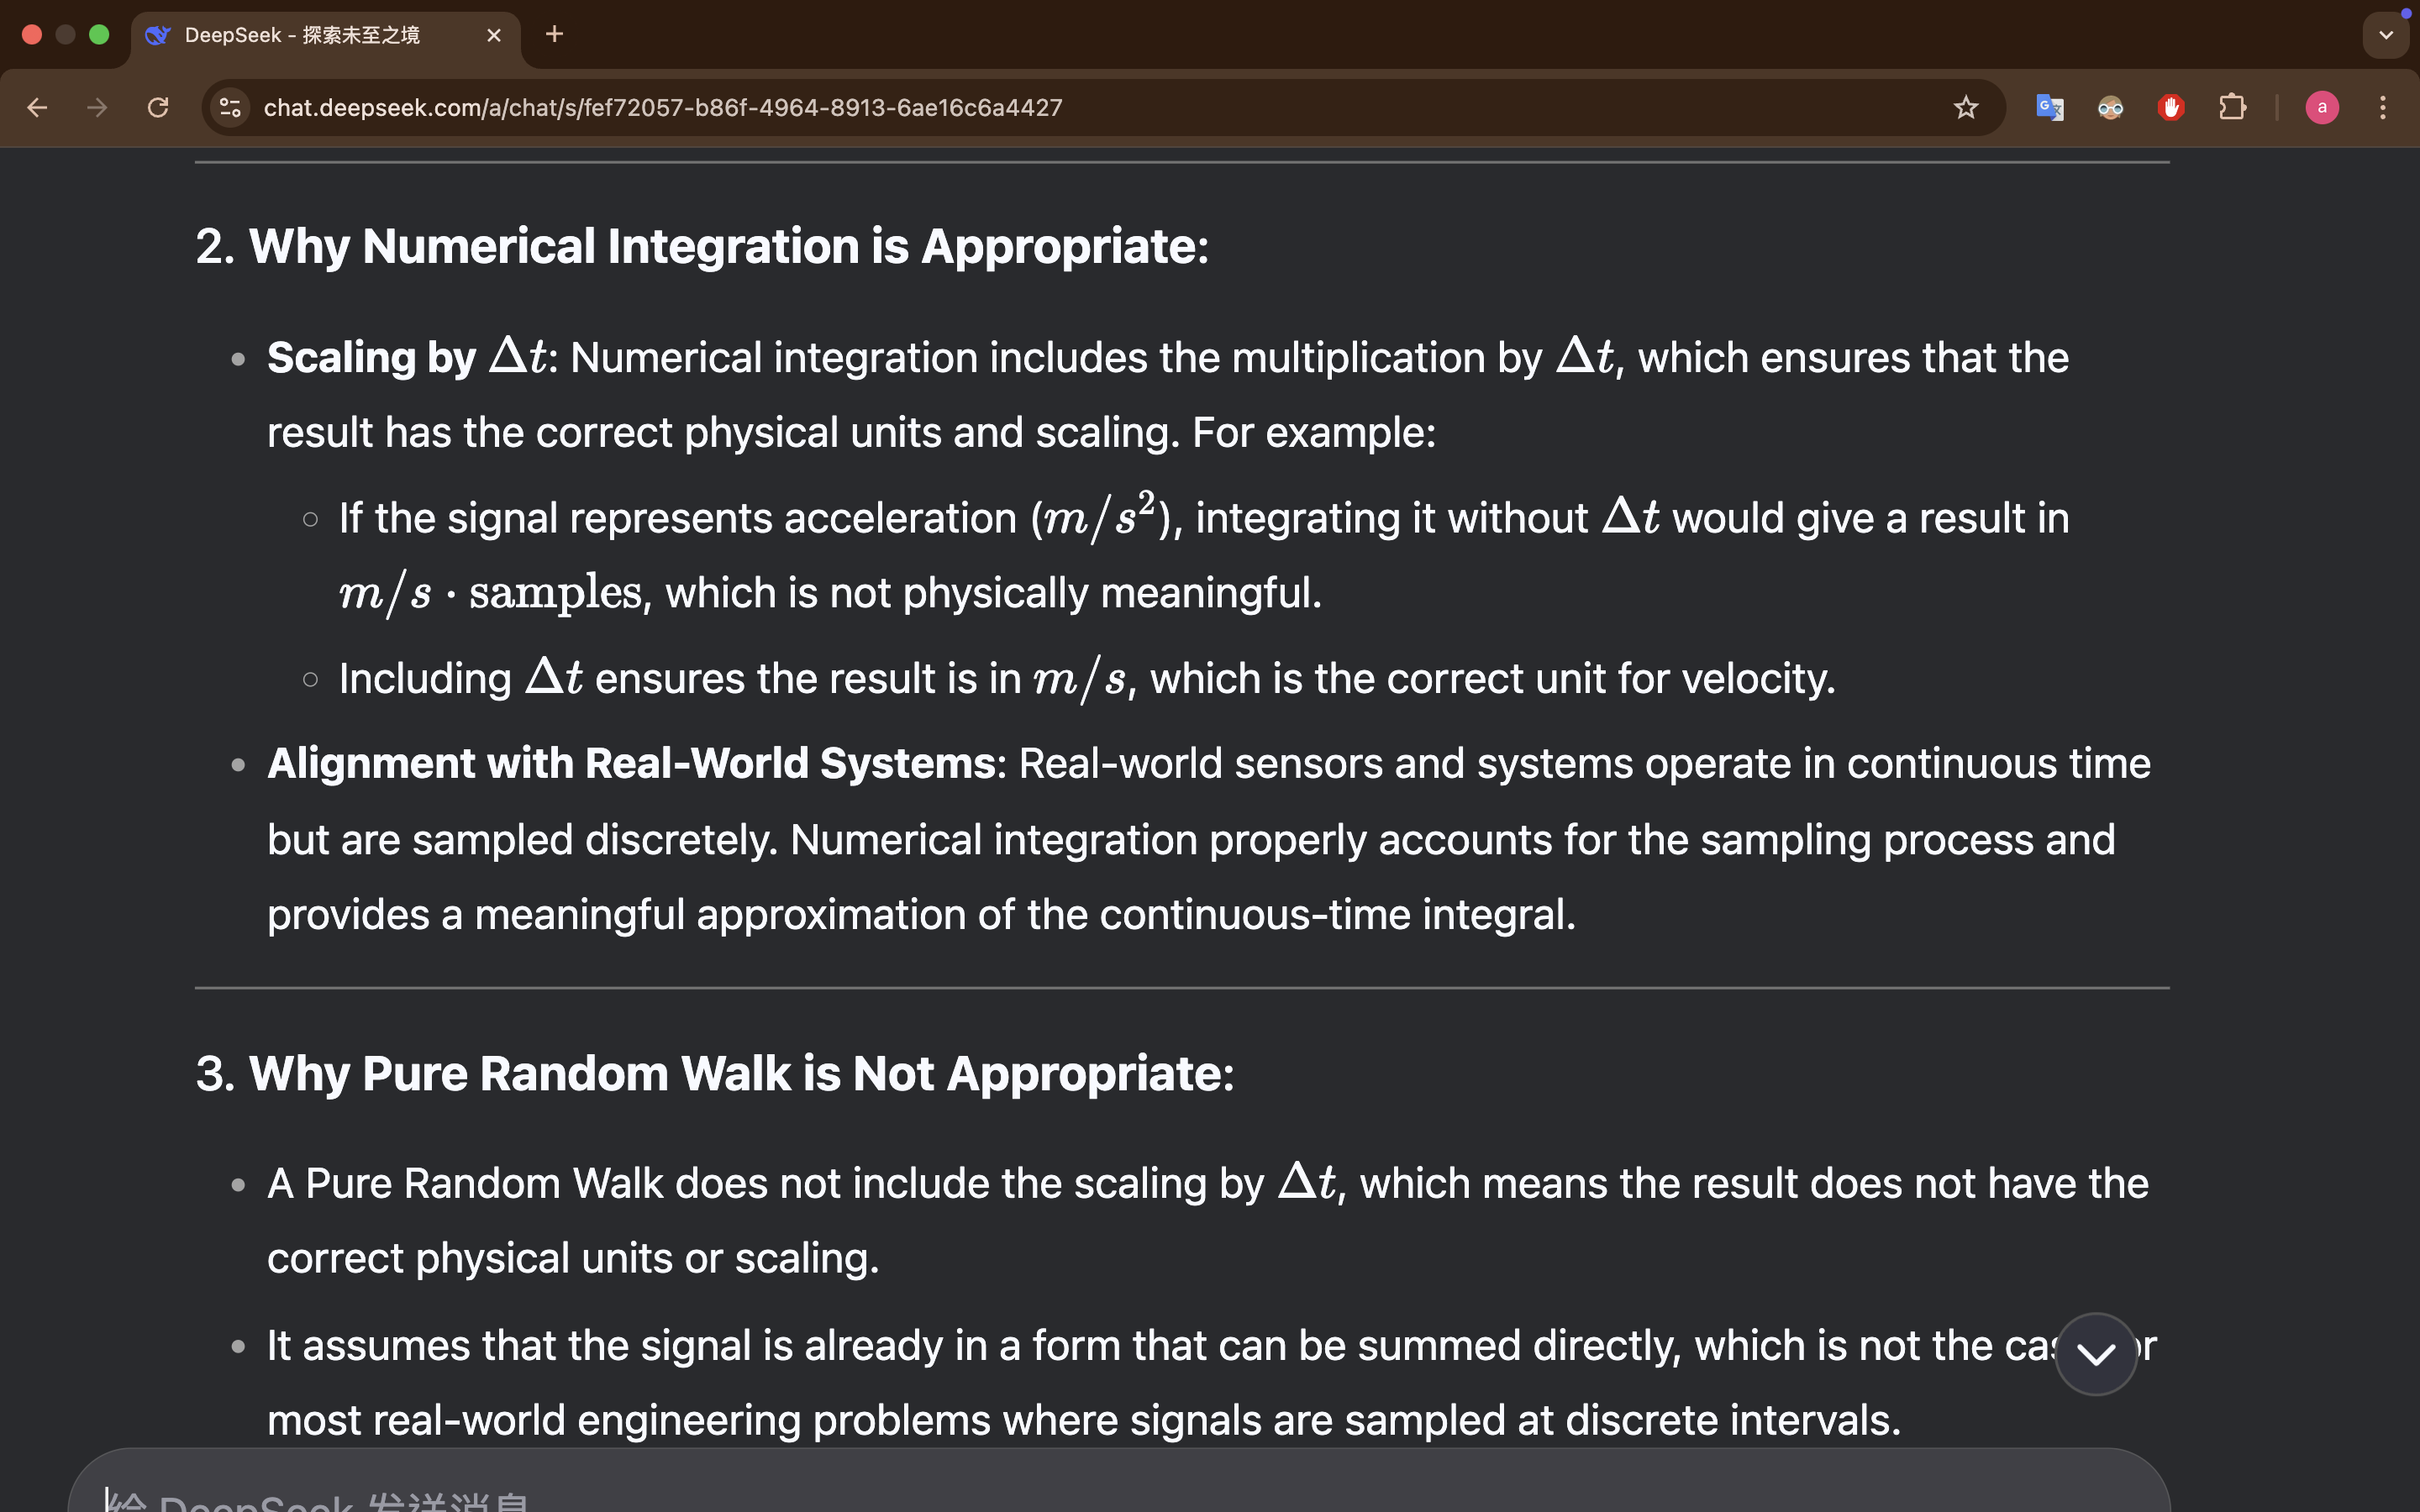

#2.Chatgpt

#1: MATLAB Simulations
num_signals = 100;
num_points = 1000;
std_dev = 2.5;

signals = std_dev * randn(num_points, num_signals);

dt = 0.001; % Sampling time
integrated_signals = cumsum(signals) * dt;
mean_values = mean(integrated_signals, 2);
std_values = std(integrated_signals, 0, 2);

time = (0:num_points-1) * dt;

figure;
subplot(2,1,1);
plot(time, mean_values);
xlabel('Time (s)');
ylabel('Mean Value');
title('Mean Value Over Time');

subplot(2,1,2);
plot(time, std_values);
xlabel('Time (s)');
ylabel('Standard Deviation');
title('Standard Deviation Over Time');

#2: Curve Fitting for Standard Deviation

log_t = log(time(2:end)); % Exclude first point (log(0) is undefined)
log_std = log(std_values(2:end));

coeffs = polyfit(log_t, log_std, 1);
c2 = coeffs(1);
c1 = exp(coeffs(2));

fprintf('Estimated c1: %.4f\n', c1);
fprintf('Estimated c2: %.4f\n', c2);
#3: Curve Fitting for Mean Value
coeffs_mean = polyfit(time, mean_values, 1);
c4 = coeffs_mean(1);
c3 = coeffs_mean(2);

fprintf('Estimated c3: %.4f\n', c3);
fprintf('Estimated c4: %.4f\n', c4);

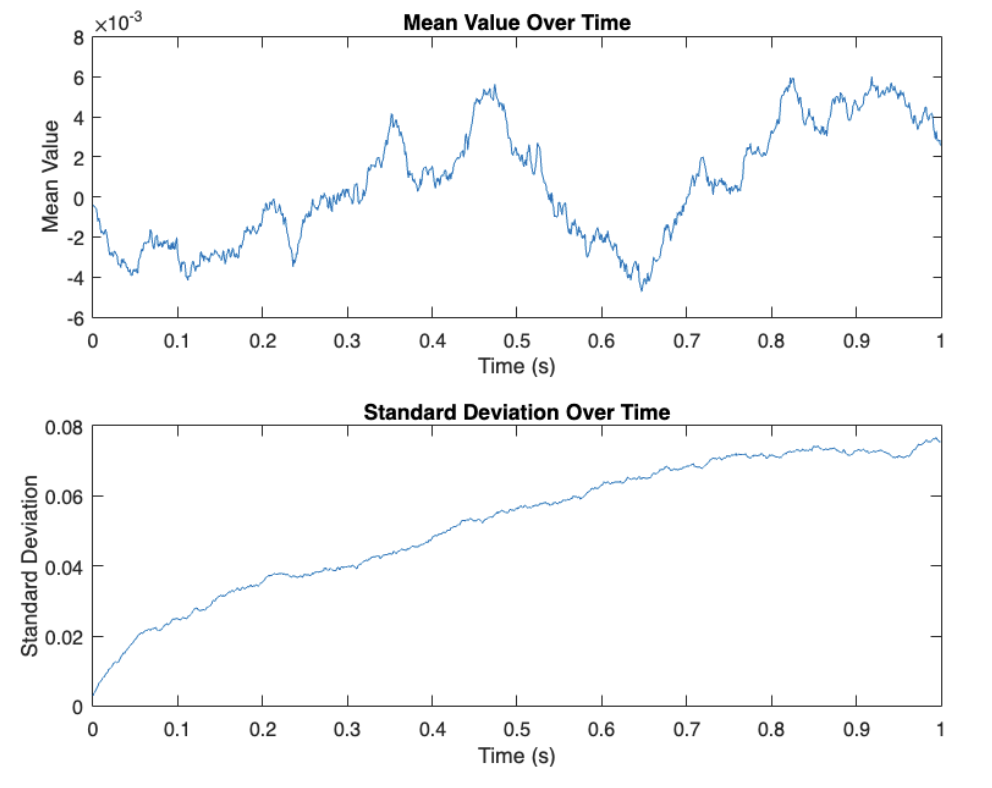

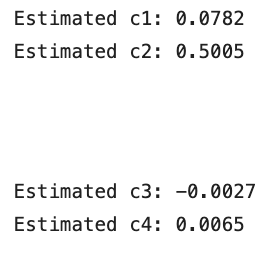

#Comments:
- Curve fitting 程式數值計算都正確，  
但是以文字詢問 C1,C2,C3,C4的結果, C1推導錯誤   
以下為回覆截圖

#Wrong calculation for C1

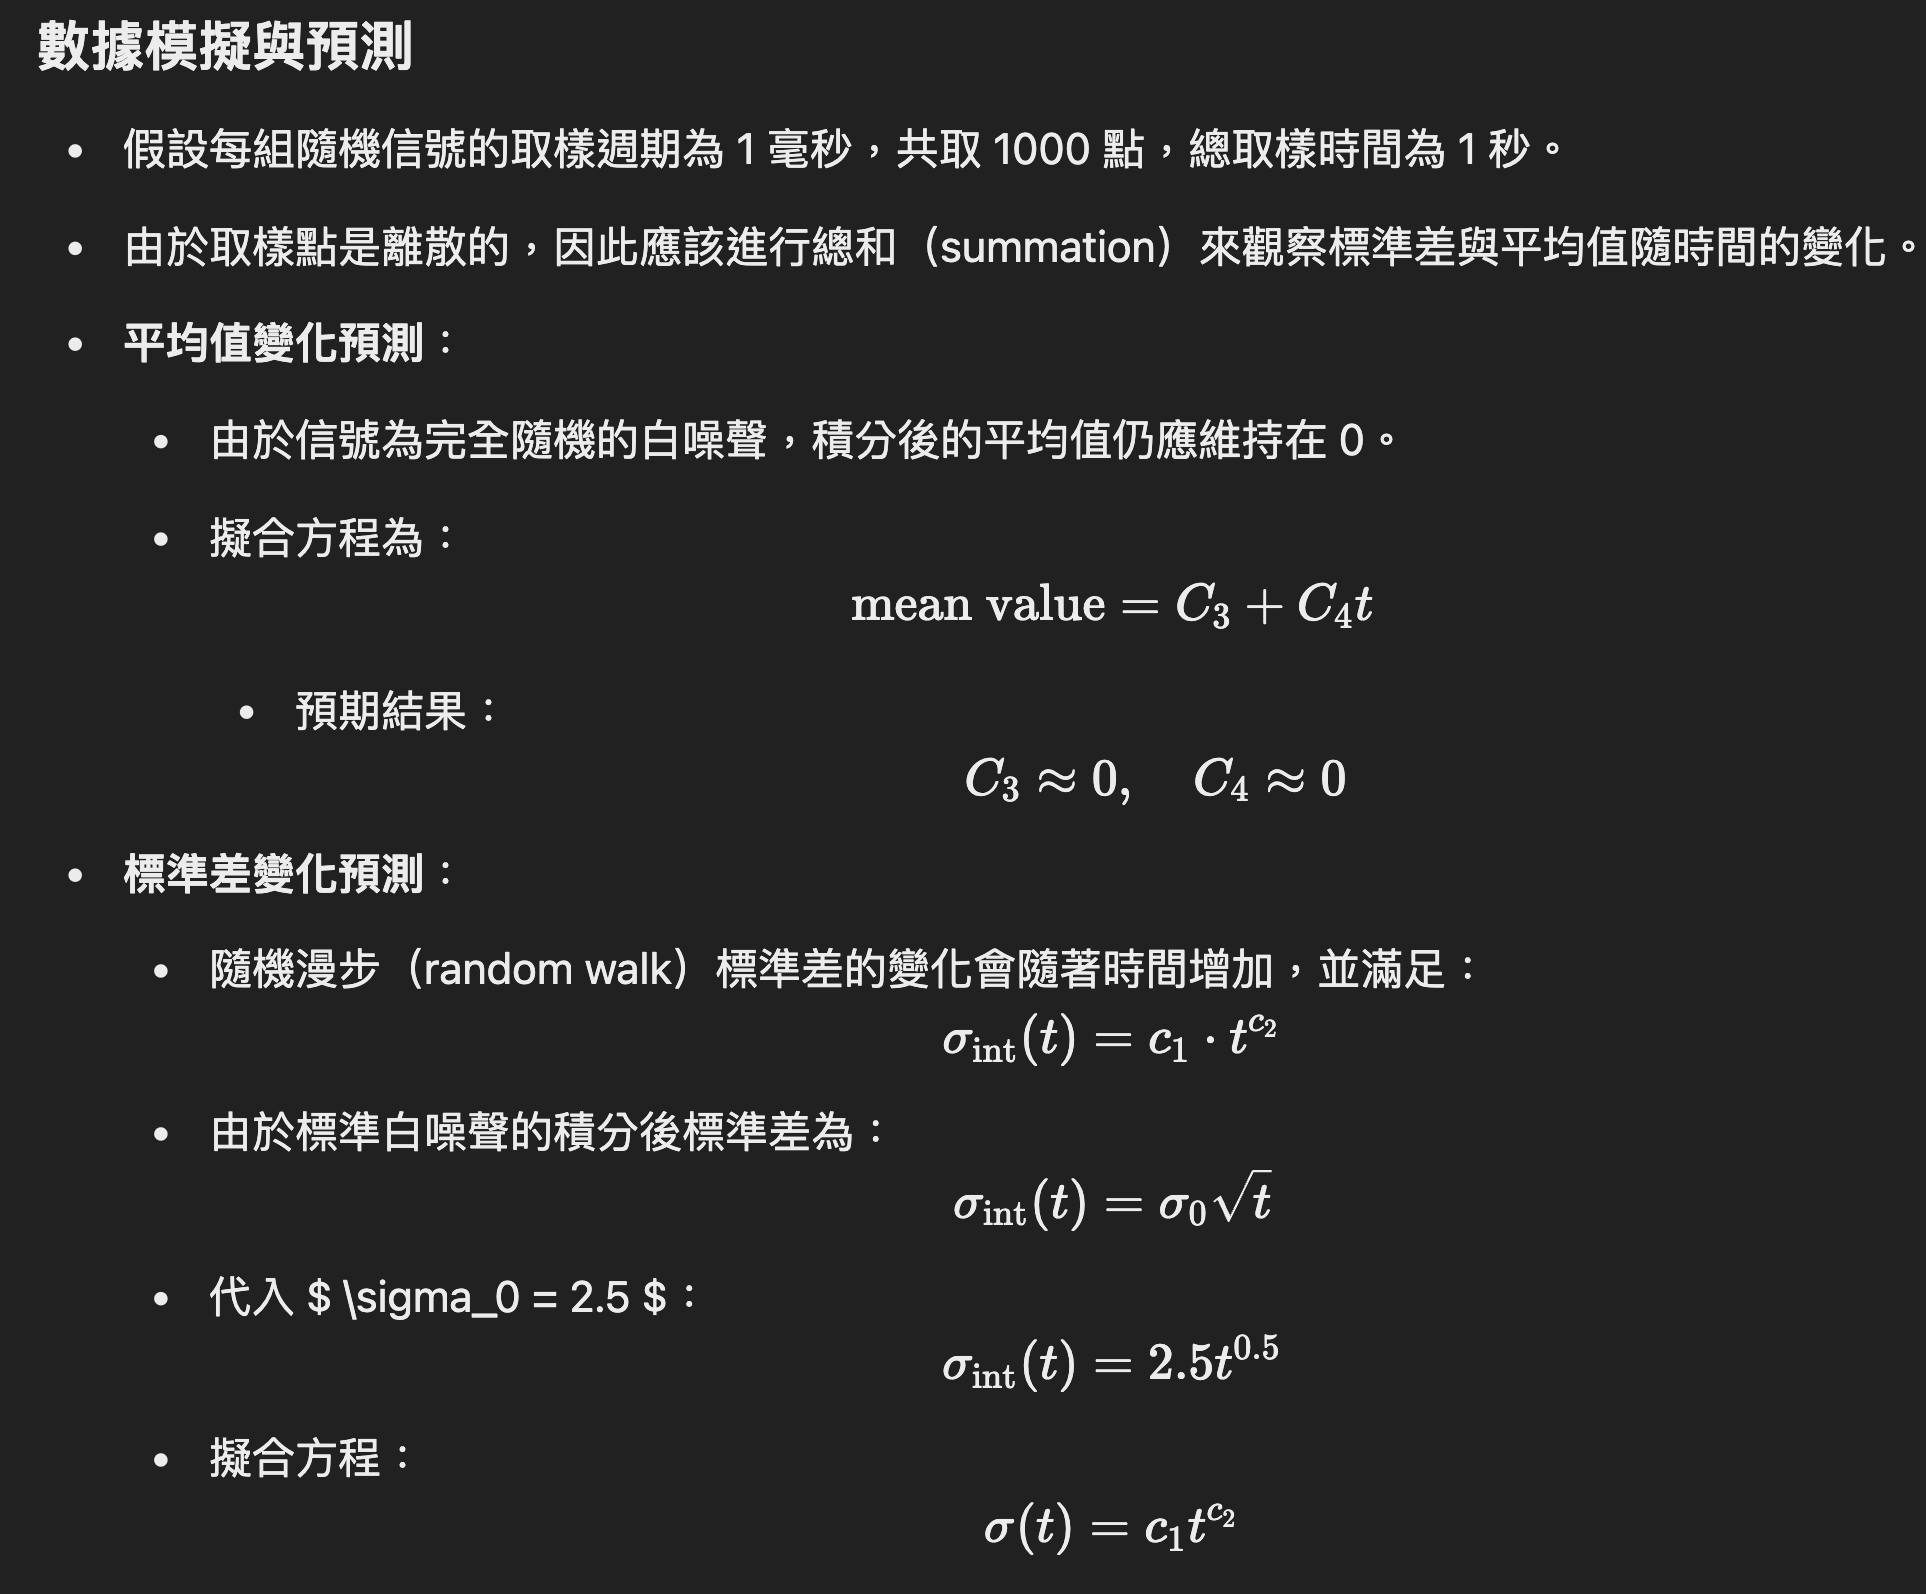

#3. Claude

#1. MATLAB Simulations
num_sets = 100;         
num_points = 1000;      
sampling_time = 0.001;  
signal_duration = 1;    
std_dev = 2.5;         
mean_val = 0;            

% Initialize arrays to store results
time = (0:num_points-1) * sampling_time;  % Time vector (0 to 0.999 seconds)
all_signals = zeros(num_sets, num_points);  
all_integrals = zeros(num_sets, num_points);  
mean_values = zeros(1, num_points);  
std_values = zeros(1, num_points);  

% Generate 100 different sets of random signals and compute their integrals
for i = 1:num_sets
%Create random signal with specified mean and std dev
signal = mean_val + std_dev * randn(1, num_points);
all_signals(i, :) = signal;
 % Compute the cumulative integral (summation * sampling_time)
    integral = zeros(1, num_points);
    for j = 2:num_points
        integral(j) = integral(j-1) + signal(j-1) * sampling_time;
    end
    all_integrals(i, :) = integral;
end

% Calculate statistical properties
for j = 1:num_points
    mean_values(j) = mean(all_integrals(:, j));
    std_values(j) = std(all_integrals(:, j));
end

% Plot results
figure(1);
subplot(2,1,1);
plot(time, mean_values);
title('Mean Value of Integrated Signals');
xlabel('Time (s)');
ylabel('Mean Value');
grid on;

subplot(2,1,2);
plot(time, std_values);
title('Standard Deviation of Integrated Signals');
xlabel('Time (s)');
ylabel('Standard Deviation');
grid on;

# 2. Curve Fitting for Standard Deviation
% Taking log of both sides: log(std) = log(c1) + c2*log(t)
% Exclude the first point (t=0) to avoid log(0) issues
valid_indices = 2:num_points;  % Start from the second point
log_time = log(time(valid_indices));
log_std = log(std_values(valid_indices));

% Perform linear regression
X = [ones(length(log_time), 1), log_time'];
b = X \ log_std';  % Least squares solution
log_c1 = b(1);
c2 = b(2);
c1 = exp(log_c1);

% Display the fitted parameters
fprintf('Fitted parameters for standard deviation = c1 * t^c2:\n');
fprintf('c1 = %f\n', c1);
fprintf('c2 = %f\n', c2);

% Plot the fitted curve against the data
figure(2);
loglog(time(valid_indices), std_values(valid_indices), 'b-', 'LineWidth', 1.5);
hold on;
fitted_std = c1 * time(valid_indices).^c2;
loglog(time(valid_indices), fitted_std, 'r--', 'LineWidth', 1.5);
title('Standard Deviation vs. Time (Log-Log Scale)');
xlabel('Time (s)');
ylabel('Standard Deviation');
legend('Simulated Data', 'Fitted Curve: c1*t^c2');
grid on;

# 3. Curve Fitting for Mean Value
% Fit mean value = c3 + c4*t
X_mean = [ones(length(time), 1), time'];
b_mean = X_mean \ mean_values';  % Least squares solution
c3 = b_mean(1);
c4 = b_mean(2);

% Display the fitted parameters
fprintf('\nFitted parameters for mean value = c3 + c4*t:\n');
fprintf('c3 = %f\n', c3);
fprintf('c4 = %f\n', c4);

% Plot the fitted curve against the data
figure(3);
plot(time, mean_values, 'b-', 'LineWidth', 1.5);
hold on;
fitted_mean = c3 + c4 * time;
plot(time, fitted_mean, 'r--', 'LineWidth', 1.5);
title('Mean Value vs. Time');
xlabel('Time (s)');
ylabel('Mean Value');
legend('Simulated Data', 'Fitted Curve: c3 + c4*t');
grid on;



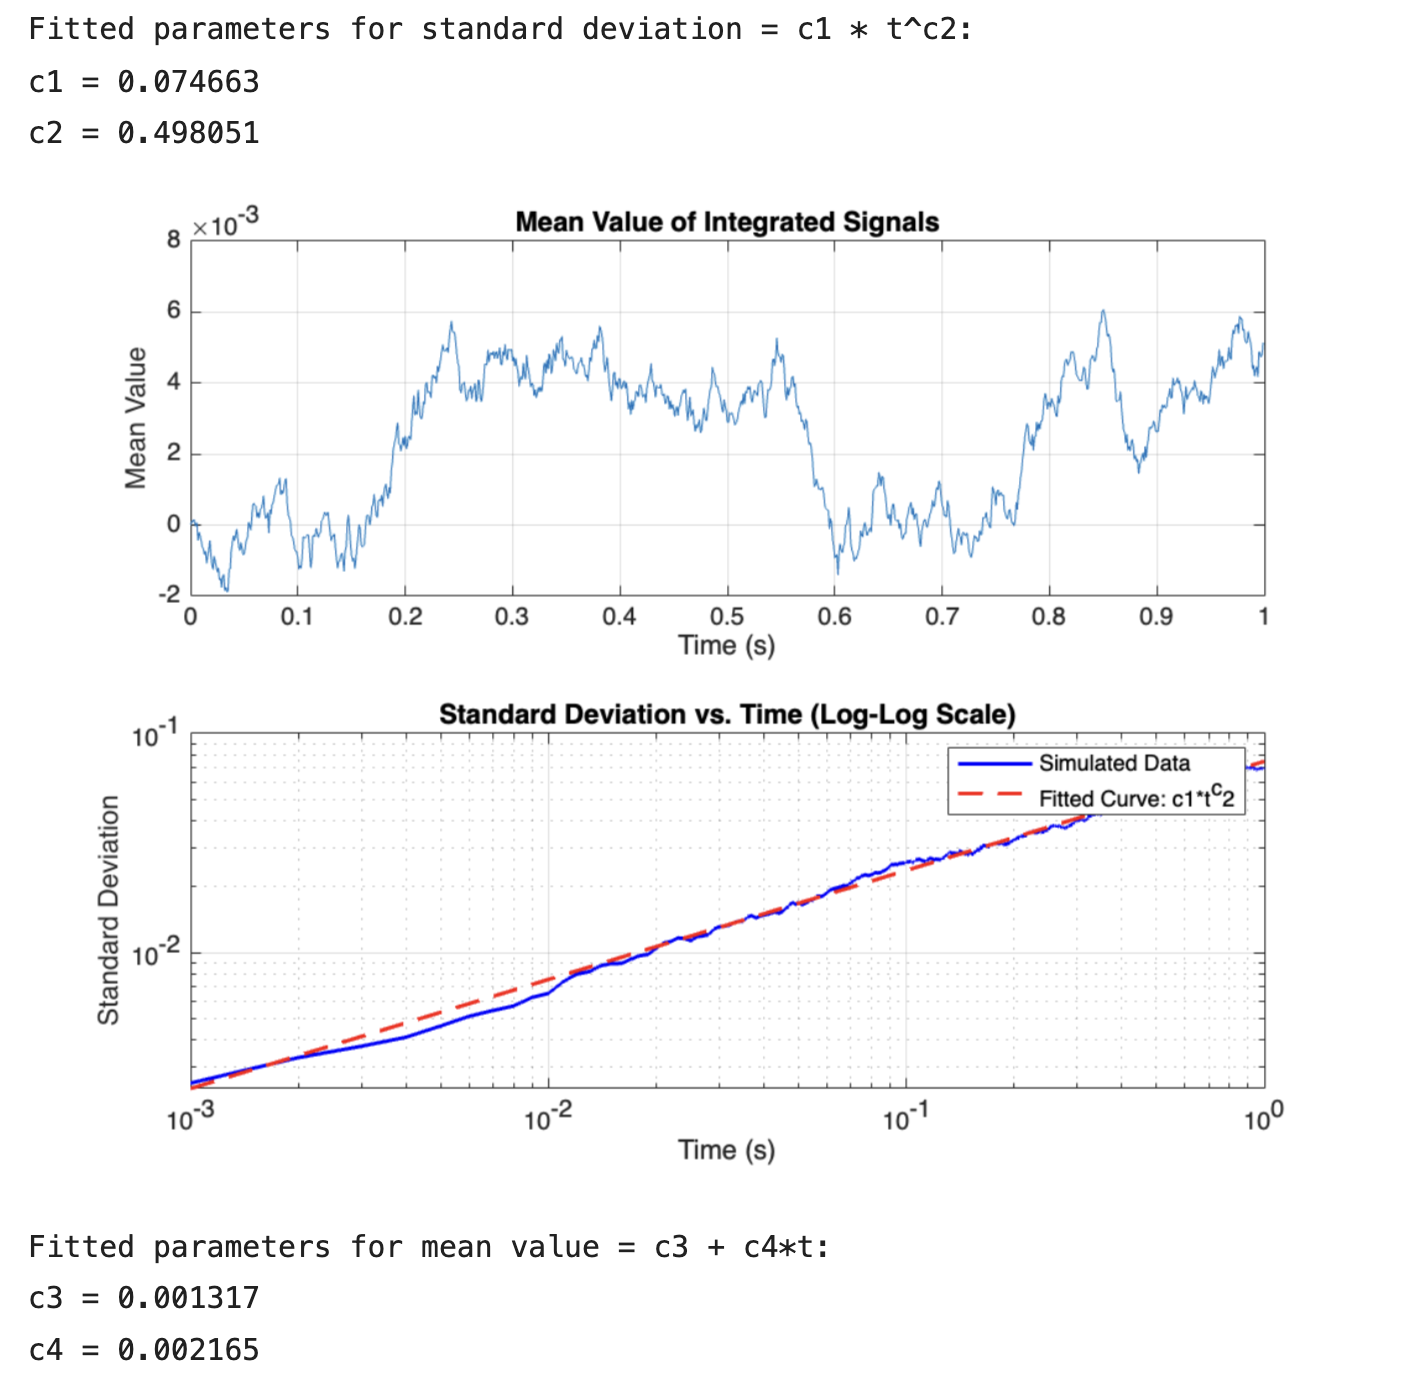

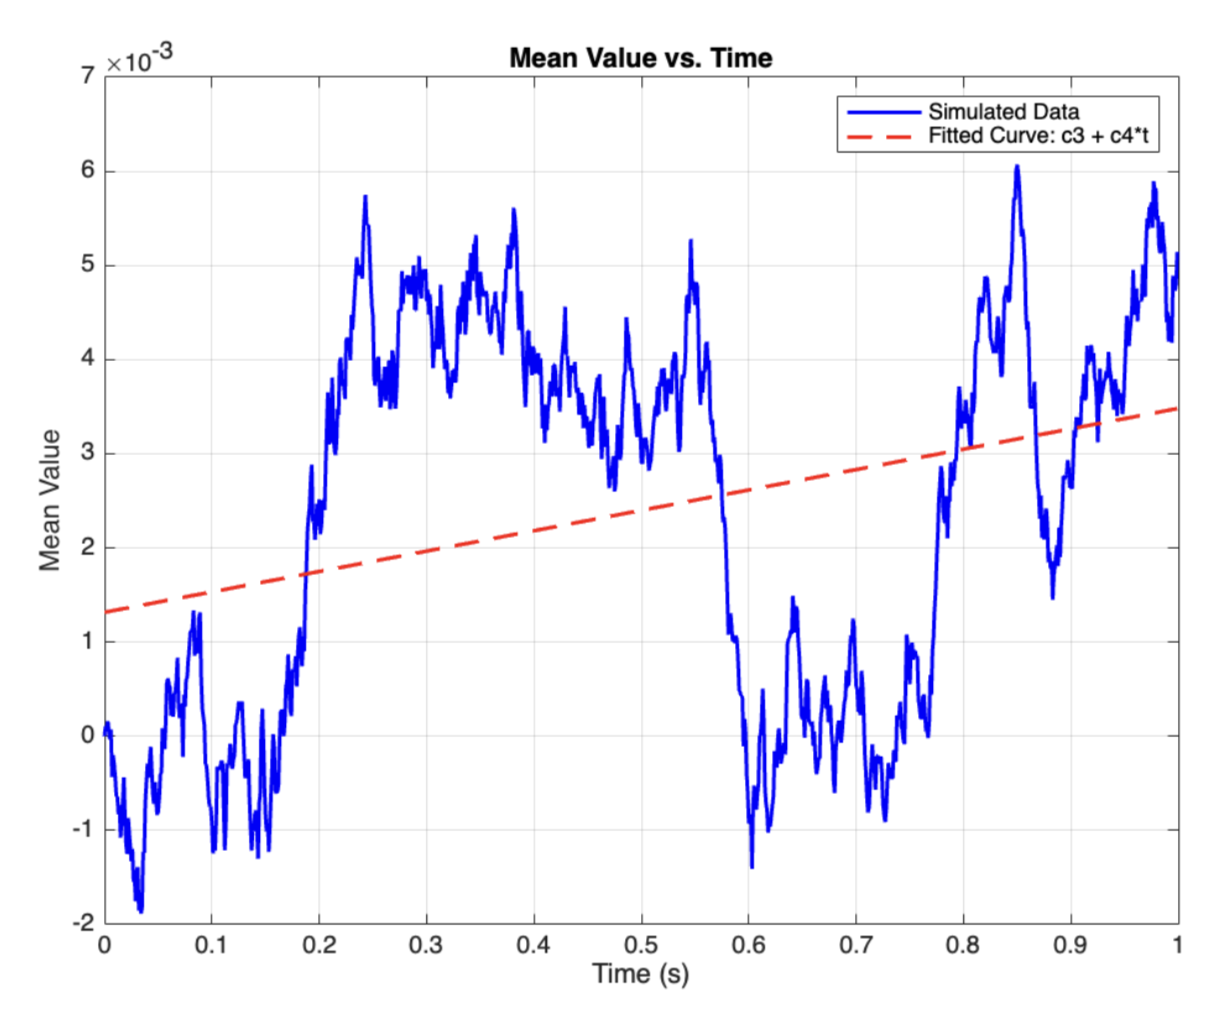

#For $C_1$ : expected value by Claude
## Model Equation
$$\sigma(t) = c_1 \cdot t^{c_2}$$

## Derivation Process
For integration of discrete white noise with standard deviation $\sigma_0 = 2.5$ and sampling time $\Delta t = 0.001$ s:

1. At time $t$, we have $n = \frac{t}{\Delta t}$ samples
2. For a random walk, standard deviation grows as:
   $$\sigma(t) = \sigma_0 \cdot \sqrt{n} \cdot \Delta t$$

3. Substituting $n = \frac{t}{\Delta t}$:
   $$\sigma(t) = \sigma_0 \cdot \sqrt{\frac{t}{\Delta t}} \cdot \Delta t = \sigma_0 \cdot \sqrt{t \cdot \Delta t}$$

4. With our values:
   $$\sigma(t) = 2.5 \cdot \sqrt{t \cdot 0.001} = 2.5 \cdot \sqrt{0.001} \cdot \sqrt{t} = 0.079 \cdot t^{0.5}$$

## Result
Therefore, the expected values are:
- $c_1 \approx 0.079$
- $c_2 \approx 0.5$


#Comments:
- 注意圖上單位有 $*10^{-3}$   
- 計算的數值皆正確。
- 推導步驟清晰,程式的作圖, 坐標軸, 單位, 標題標示清楚  
- 有額外做 fitting curve 的圖和下方的 Additional visualization   
- 可由下方圖看出,隨時間增加random walk 的可能結果越分散,標準差越大,符合推導  
- 有額外的繪圖使能更具象化的分析模型


#4.Additional visualization: Plot a few sample signals and their integrals
figure(4);
subplot(2,1,1);
for i = 1:5  % Plot 5 random signals
    plot(time, all_signals(i,:));
    hold on;
end
title('Sample Random Signals');
xlabel('Time (s)');
ylabel('Amplitude');
grid on;

subplot(2,1,2);
for i = 1:5  % Plot their integrals
    plot(time, all_integrals(i,:));
    hold on;
end
title('Integrated Signals');
xlabel('Time (s)');
ylabel('Integrated Value');
grid on;

% Display theoretical expectations
fprintf('\nTheoretical expectations for random walk integration:\n');
fprintf('- Mean should approach zero (with some fluctuation)\n');
fprintf(['- Standard deviation should grow proportionally to sqrt(t) (c2 ≈ 0.5)\n']);


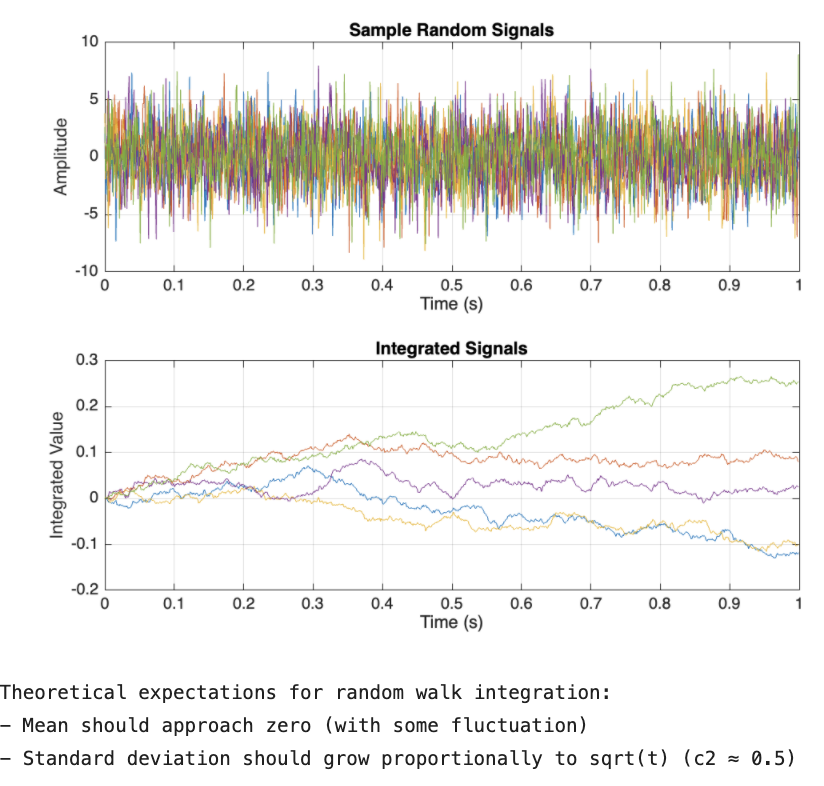

#總結：
我覺得處理 ❗**此工程問題** ❗, Claude ✅ 的表現最好, 無論推導還是視覺化模型都做得很好,   
尤其是在寫程式方面能力非常出色, 和市面上許多人做的benchmark 結果一樣     
另外個人覺得 Claude ✅ 的介面也是設計的最好的, 有將程式和解說的部分分開寫,    
程式複製貼上和要讀解說時都更加方便   
解說的步驟也相較deepseek/chatgpt詳細許多,  
他們是需要自己做許多額外要求, 比較像是問一句答一句, 自己比較沒有主動性,   
而且有錯誤時, 必須要一步一步引導他們反思, 直接問有沒有錯誤,可能找不太到  
而 chatgpt ✅ 相較於 deepseek 好一些, 程式本身正確但直接問預測結果錯誤  
deepseek(深度求索) ✅ 是程式和推論都沒考慮 sampling time.